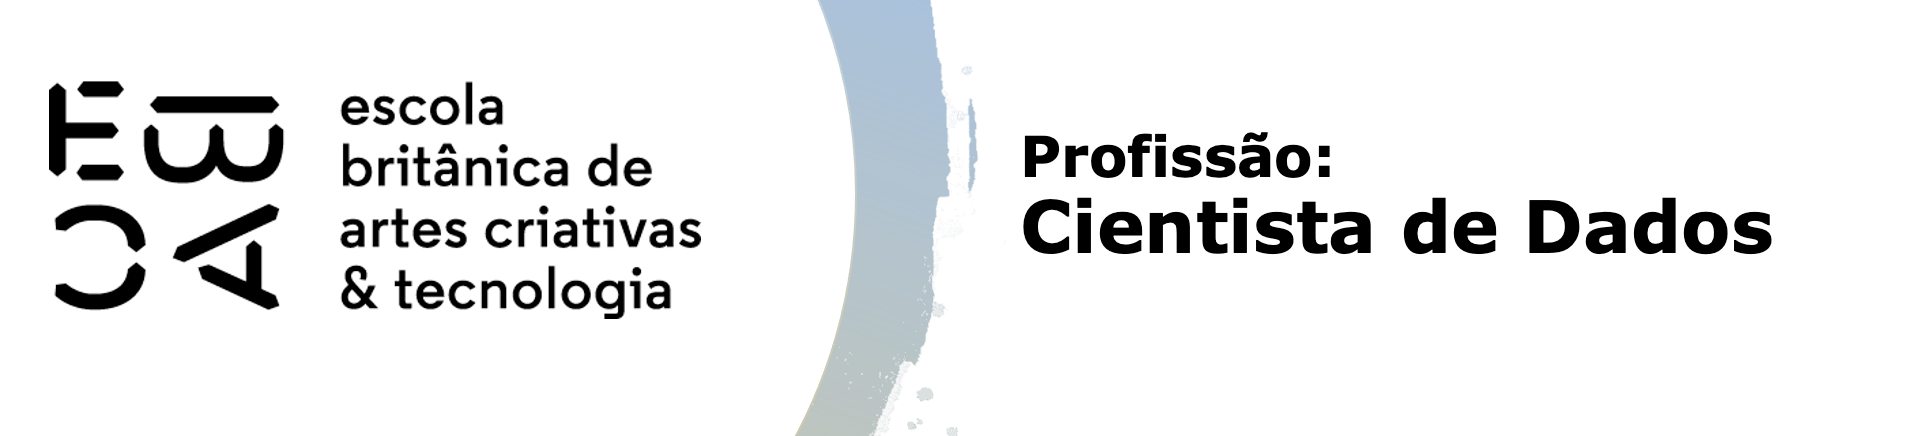

# Tarefa

In [7]:
import pandas as pd
import seaborn as sns
from statsmodels.stats.weightstats import ttest_ind

In [3]:
pg = sns.load_dataset('penguins')

In [4]:
pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


<Axes: xlabel='sex', ylabel='body_mass_g'>

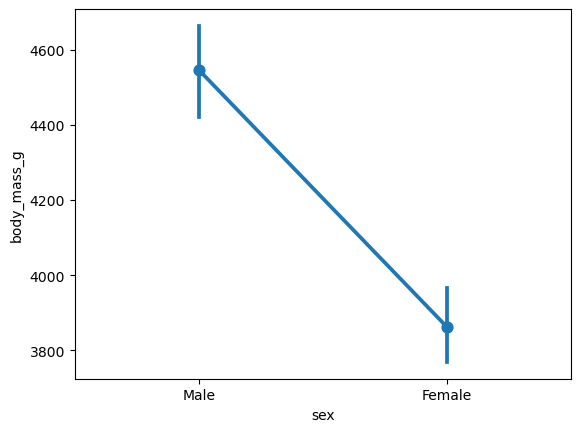

In [5]:
sns.pointplot(data=pg, x='sex', y = 'body_mass_g')

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

In [ ]:
# Separar os grupos
peso_machos = pg.loc[pg['sex'] == 'Male', 'body_mass_g']
peso_femeas = pg.loc[pg['sex'] == 'Female', 'body_mass_g']

# Teste t
t_stat, p_valor, df = ttest_ind(peso_machos, peso_femeas, alternative='two-sided', usevar='unequal', value=0)

# Exibir resultados
print(f'Estatística t: {t_stat:.2f}')
print(f'Valor-p: {p_valor:.4f}')
print(f'Graus de liberdade aproximados: {df:.1f}')

# Conclusão
if p_valor < 0.05:
    print("Rejeitamos H₀: há evidência de diferença significativa de peso entre machos e fêmeas.")
else:
    print("Não rejeitamos H₀: não há evidência suficiente para afirmar que o peso difere entre os sexos.")

Estatística t: 8.55
Valor-p: 0.0000
Graus de liberdade aproximados: 323.9
Rejeitamos H₀: há evidência de diferença significativa de peso entre machos e fêmeas.


## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

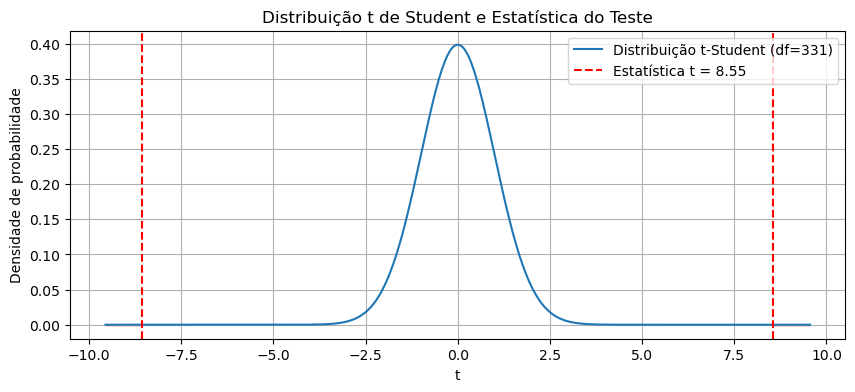

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t as t_student

# Estimativa dos graus de liberdade
df = len(peso_machos) + len(peso_femeas) - 2 

# Ajuste automático dos limites do gráfico
lim = max(4, abs(t_stat) + 1)
x = np.linspace(-lim, lim, 500)
y = t_student.pdf(x, df)

# Gráfico
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(x, y, label=f'Distribuição t-Student (df={int(df)})')

# Linhas verticais da estatística t
ax.axvline(x=t_stat, color='red', linestyle='--', label=f'Estatística t = {t_stat:.2f}')
ax.axvline(x=-t_stat, color='red', linestyle='--')

# Áreas para p-valor (teste bilateral)
x_fill_pos = x[x >= t_stat]
x_fill_neg = x[x <= -t_stat]
ax.fill_between(x_fill_pos, t_student.pdf(x_fill_pos, df), color='red', alpha=0.4)
ax.fill_between(x_fill_neg, t_student.pdf(x_fill_neg, df), color='red', alpha=0.4)

# Estética
ax.set_title("Distribuição t de Student e Estatística do Teste")
ax.set_xlabel("t")
ax.set_ylabel("Densidade de probabilidade")
ax.legend()
ax.grid(True)
plt.show()

## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

In [20]:
# Carregar a base
pg = sns.load_dataset('penguins')

# Inicializar lista para resultados
resultados = []

# Loop por espécie
for especie in pg['species'].unique():
    subset = pg[pg['species'] == especie]
    machos = subset[subset['sex'] == 'Male']['body_mass_g']
    femeas = subset[subset['sex'] == 'Female']['body_mass_g']

    # Teste t bilateral, amostras independentes, variâncias diferentes
    estatistica_t, p_valor, _ = ttest_ind(machos, femeas, usevar='unequal', alternative='two-sided')

    resultados.append({'Espécie': especie, 'Estatística t': estatistica_t, 'p-valor': p_valor})

# Mostrar resultados
df_resultados = pd.DataFrame(resultados)
print(df_resultados)

     Espécie  Estatística t       p-valor
0     Adelie      13.126286  6.402320e-26
1  Chinstrap       5.207734  2.264432e-06
2     Gentoo      14.761368  1.867760e-28
